In [9]:
import pickle
import os
import json
from datetime import datetime
from dotenv import load_dotenv
from AvevaInsightLibrary.src import Aveva_Insight
load_dotenv() 
%matplotlib inline

ModuleNotFoundError: No module named 'AvevaInsightLibrary'

In [2]:
auth_token = os.getenv('BEARER_TOKEN')
aveva = Aveva_Insight(auth_token)

In [3]:
#tagnames = ['ES-LaPenilla.EUR.Spain.LaPenilla.UTI01.ES01.HV01.IsMainPowerSupplyEntrance', 
'ES-LaPenilla.EUR.Spain.LaPenilla.UTI01.ES01.HV01.PowerFactorTarget', 
'ES-LaPenilla.EUR.Spain.LaPenilla.UTI01.ES01.HV01.PowerFactor', 
'ES-LaPenilla.EUR.Spain.LaPenilla.UTI01.ES01.HV01.CostOfElectricity', 
'ES-LaPenilla.EUR.Spain.LaPenilla.UTI01.ES01.HV01.ActivePower'

tagnames = ['CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.FeedWaterFlow']
startTime = datetime(2023, 6, 1, 0, 0)
endTime = datetime(2023, 7, 5, 0, 0)


for tag in tagnames:
    # Fetch tag data
    df = aveva.get_Insight_Data(tag, startTime, endTime, RetrievalMode="FULL")

    csv_data = df.to_csv(index=False) 

    # Save to json
    with open(f'{tag}.csv', 'w', newline='') as f:
        f.write(csv_data)


next: 1
next: 2
next: 3
next: 4
next: 5
next: 6
next: 7
next: 8
next: 9
next: 10
end: 11


In [43]:
# reset the index to ensure it is unique
#df = df.reset_index()

df.to_json('60_days_full_ES-LaPenilla.EUR.Spain.LaPenilla.UTI01.BH01.COG01.SteamFlow.json', orient='records')

<Axes: >

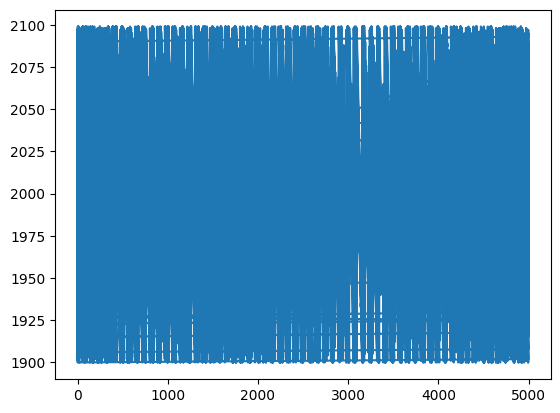

In [9]:
df['Value'].plot()

In [38]:
#expression = 'total([ES-LaPenilla.EUR.Spain.LaPenilla.UTI01.BH01.PKBOI01.SteamFlow], month)'
expression = '(((TOTAL([CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.SteamFlow], 1 FixedMonth) / 24) * AVERAGE([CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.SteamEnthalpy], 1 Month) * 1000 ) / ( (TOTAL([CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.GasFuelFlow], 1 Month) * [CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.GasFuelGrossCalorificValue]) + (TOTAL([CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.LiquidFuelFlow], 1 Month) * [CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.LiquidFuelGrossCalorificValue]) + (TOTAL([CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.BiomassFuelFlow], 1 Month) * [CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.BiomassGrossCalorificValue]) ) ) AS [CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBOI01.Efficiency]'
startTime = datetime(2023, 6, 1, 0, 0)
endTime = datetime(2023, 7, 5, 0, 0)

exDF = aveva.get_Expression_Data(expression, startTime, endTime, RetrievalMode="DELTA")

end: 1


In [39]:
exDF.head(10)

,FQN,DateTime,OpcQuality,Value,Unit,InterpolationType
0,CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBO...,2023-06-01T08:00:00Z,64,935.054879,Undefined,StairStep
1,CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBO...,2023-07-01T08:00:00Z,64,935.057001,Undefined,StairStep
2,CH-Vevey.EUR.Switzerland.Vevey.UTI01.BH01.PKBO...,2023-07-31T08:00:00Z,64,939.021994,Undefined,StairStep


In [4]:
tags = aveva.get_Tag_List()

tags.head(10)

NameError: name 'aveva' is not defined